## 導入函式庫

In [ ]:
pip install discord

## 基礎discord.py程式-範例

**注意! 使用Colab僅是為了方便教學，無法實現機器人24小時上線，如果需要長時間託管機器人建議尋找其他線上編輯器(replit等)**

可以參考下面影片:
https://www.youtube.com/watch?v=UT1h9un4Cpo&pp=ygUdZGlzY29yZOapn-WZqOS6uuiol-euoSByZXBsaXQ%3D

或是使用:https://freeserver.tw

In [ ]:
import discord
from discord.ext import commands

bot = commands.Bot(command_prefix='!', intents=discord.Intents.all()) # 設定 Discord bot

@bot.event
async def on_ready():
    print(f'bot on ready！')

async def main():
    await bot.start("你的token") #放入你的token

await main()


如果你是用VS Code等等線下編輯器
```python
async def main():
    await bot.start("你的token")

await main()
```
這段直接改成下面即可
```python
bot.run('你的token')
```

注意! 兩種方法都必須放在程式最尾端

In [ ]:
# Say指令
@bot.command()
async def say(ctx, *msg):
    await ctx.channel.send(' '.join(msg))

In [ ]:
# on_message事件
# 注意 請先移除@bot.command()，否則兩者會衝突
@bot.event
async def on_message(msg):
    if msg.author == bot.user:
        return
    await msg.channel.send(msg.content)

## 延伸! FreeServer使用教學


1. 到 [dash](https://dash.freeserver.tw/) 登入 Discord 帳號
2. 記好你的密碼

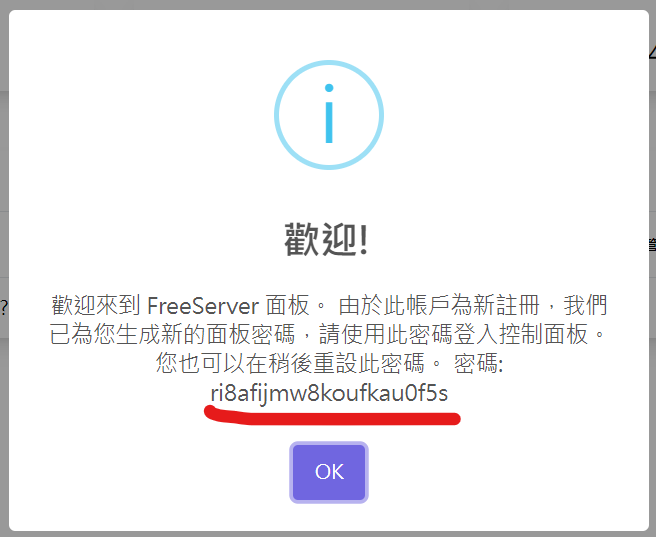

3. 選擇左邊的**創建伺服器**

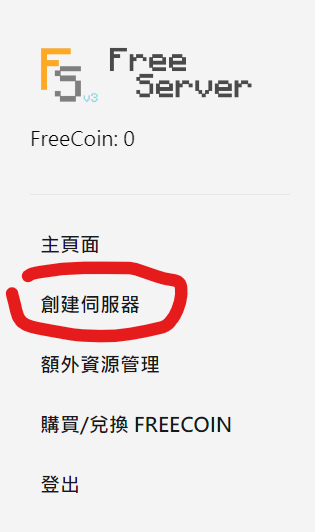

4. 伺服器類型選擇Python 配置自己選(盡量不要低於10% 128MB 128MB)

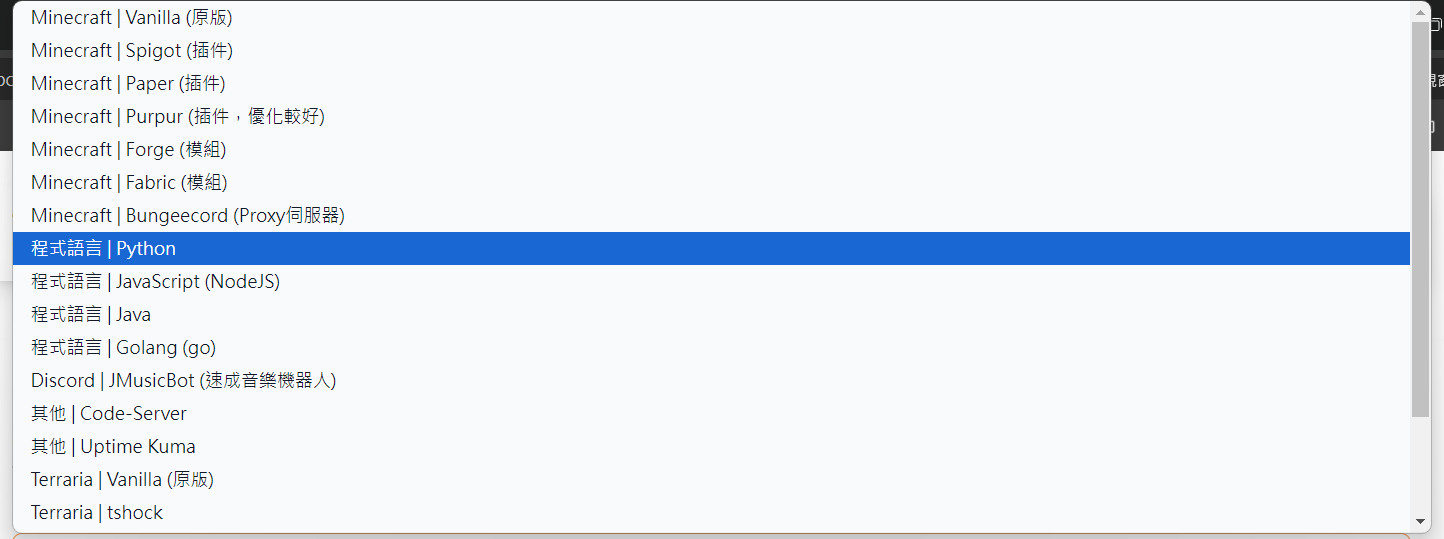

5.進入 [面板](https://panel.freeserver.tw/) 後登入

選擇左邊那排的"檔案管理"

將python檔案(.py)放入裡面，並將主檔案命名成app.py(也可以自己去啟動設定改)

回到"控制台"點擊右上角的"開始"即可執行



## Gemini API實作

In [ ]:
#https://ai.google.dev/

import google.generativeai as genai

genai.configure(api_key="你的api key") #記得放入自己的api key

generation_config = {
  "temperature": 0.9,
  "top_p": 1,
  "max_output_tokens": 2048,
  "response_mime_type": "text/plain",
}

model = genai.GenerativeModel(
  model_name="gemini-1.0-pro",
  generation_config=generation_config,
)

chat_session = model.start_chat(
  history=[
  ]
)

while True:
    response = chat_session.send_message(input())
    print(response.text)